In this benchmark, we try to achieve the highest throughput (MB/s) while reading a single ROOT file.

In [1]:
import os, sys
sys.path.append(os.getcwd()+"/../af_benchmark")
from benchmark import Benchmark, run_benchmark
import numpy as np
import tqdm
import time
from dask_gateway import Gateway

# nworkers_options = [1]
# nworkers_options = [60,50,40,30,20,10]
nworkers_options = [1,2,3,4,5,6,7,8]
col_num_options = [30,60,90,120,150,180,210,240,270,300]
# nworkers_options = [8]
# col_num_options = [1200]

b = Benchmark("config_2.1.yaml")
for nworkers in nworkers_options:
    for col_num in tqdm.tqdm(col_num_options):
        b.config["executor"]["n_workers"] = int(nworkers)
        b.config["processor"]["columns"] = int(col_num)
        b.reset(keep_cluster=True, reset_workers=True)
        b.run()
        b.update_report()

report = b.report_df

2024-02-28 06:52:43,422 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-a9mjujb9', purging
2024-02-28 06:52:43,422 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-eetrlm8i', purging
2024-02-28 06:52:43,423 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ploug8ah', purging
2024-02-28 06:52:43,423 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-6awp5r3r', purging
2024-02-28 06:52:43,423 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-v5pq_c61', purging
2024-02-28 06:52:43,423 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-mlsq6ebr', purging
2024-02-28 06:52:43,423 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-_235356y', purging

In [ ]:
report

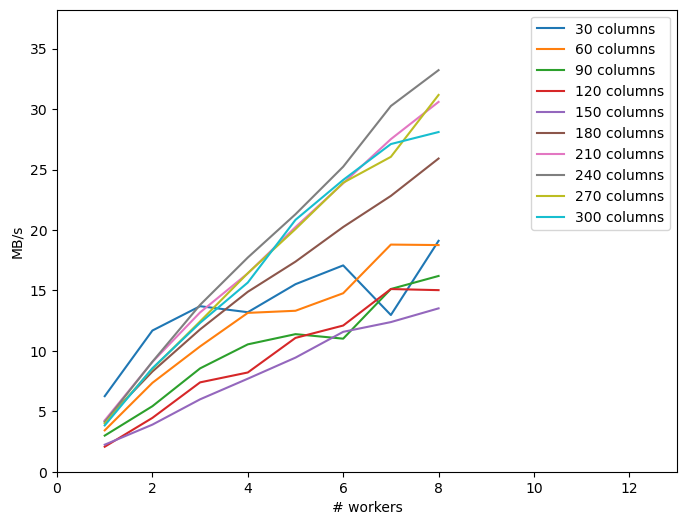

In [2]:
import matplotlib.pyplot as plt

report["MB/s (compressed)"] = report.compressed_bytes/report.process_columns/(1024*1024)

report_by_ncols = report.groupby('n_columns_read')

plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group["MB/s (compressed)"], label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('MB/s')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report['MB/s (compressed)'].max() + 5)
plt.show()

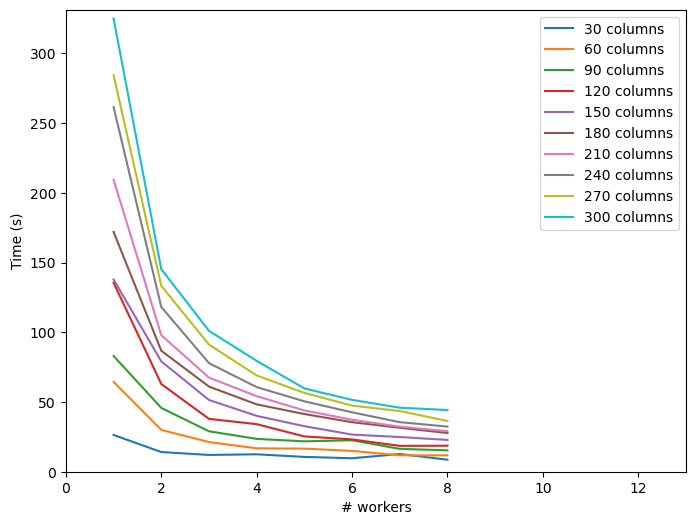

In [4]:
plt.figure(figsize=(8, 6))
for ncols, group in report_by_ncols:
    plt.plot(group.n_workers, group.process_columns, label=f"{ncols} columns")

plt.xlabel('# workers')
plt.ylabel('Time (s)')
plt.legend()
plt.xlim(0, report.n_workers.max()+5)
plt.ylim(0, report.run.max() + 5)
plt.show()